In [1]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [2]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)

### Обработка набора данных

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

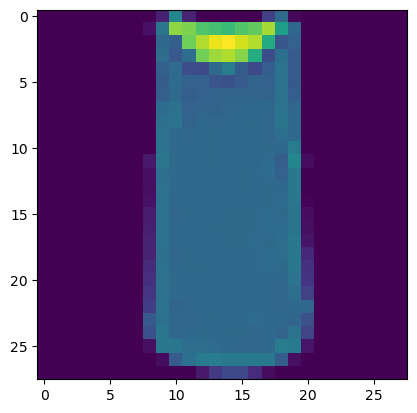

In [4]:
plt.imshow(x_train[2])

In [5]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train.shape[1] * x_train.shape[2]

784

In [9]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [10]:
x_train.shape

(60000, 784)

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
y_train.shape

(60000,)

In [13]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)  #to_categorical - это OHE
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
y_train.shape

(60000, 10)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
input_shape = (x_train.shape[1])

In [17]:
input_shape

784

In [18]:
a = np.array([10, 5, 5, 5])

In [19]:
a / a.sum() # так работает softmax, чтоб сумма всех нейронов былоа равна 1


array([0.4, 0.2, 0.2, 0.2])

In [20]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [21]:
x_train.shape

(60000, 784)

1 - пример - считаем по мену ошибку - это онлайн обучение

пакетное обучение

минипакетное обучение - batch_size = 128  - считаем градиентное обучение и по ним расчитываем веса

In [22]:
batch_size = 128  #
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 1s 2ms/step - loss: 0.5644 - accuracy: 0.8011 - val_loss: 0.4475 - val_accuracy: 0.8438
Epoch 2/20
422/422 [==============================] - 1s 2ms/step - loss: 0.4040 - accuracy: 0.8557 - val_loss: 0.4041 - val_accuracy: 0.8592
Epoch 3/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.8710 - val_loss: 0.3527 - val_accuracy: 0.8713
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8800 - val_loss: 0.3556 - val_accuracy: 0.8718
Epoch 5/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3163 - accuracy: 0.8846 - val_loss: 0.3436 - val_accuracy: 0.8797
Epoch 6/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2976 - accuracy: 0.8905 - val_loss: 0.3420 - val_accuracy: 0.8788
Epoch 7/20
422/422 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.8951 - val_loss: 0.3383 - val_accuracy: 0.8772
Epoch 

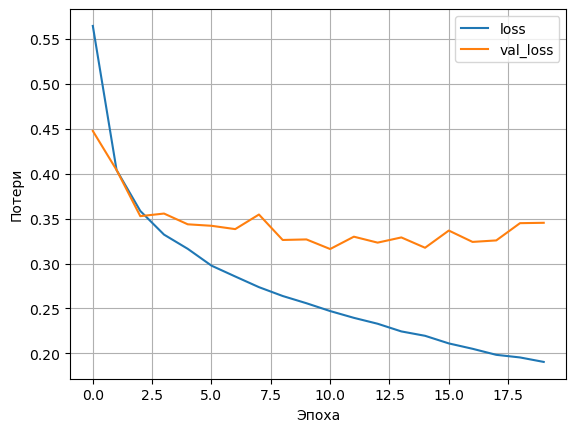

In [23]:
plot_loss(history)

### Обучение сверточной сети

In [24]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
np.expand_dims(x_train, -1).shape  #добавляет еденицу

(60000, 28, 28, 1)

In [27]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
y_train.shape

(60000, 10)

In [29]:
input_shape

(28, 28, 1)

In [30]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               540900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

Epoch 1/5
422/422 [==============================] - 7s 16ms/step - loss: 0.4948 - accuracy: 0.8274 - val_loss: 0.3770 - val_accuracy: 0.8678
Epoch 2/5
422/422 [==============================] - 7s 16ms/step - loss: 0.3280 - accuracy: 0.8834 - val_loss: 0.3142 - val_accuracy: 0.8865
Epoch 3/5
422/422 [==============================] - 7s 15ms/step - loss: 0.2820 - accuracy: 0.8996 - val_loss: 0.2762 - val_accuracy: 0.9050
Epoch 4/5
422/422 [==============================] - 6s 15ms/step - loss: 0.2515 - accuracy: 0.9094 - val_loss: 0.2687 - val_accuracy: 0.9058
Epoch 5/5
422/422 [==============================] - 7s 15ms/step - loss: 0.2274 - accuracy: 0.9177 - val_loss: 0.2661 - val_accuracy: 0.9035


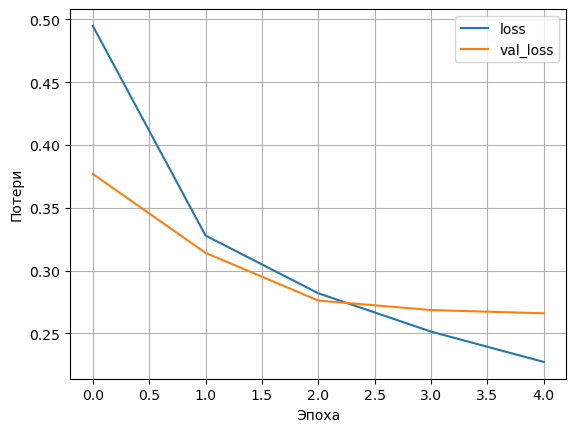

In [31]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
plot_loss(history)

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.28412139415740967
Test accuracy: 0.8970999717712402


Увеличиваем количество фильтров

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_5 (Dense)             (None, 100)               1254500   
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
____________________________________________

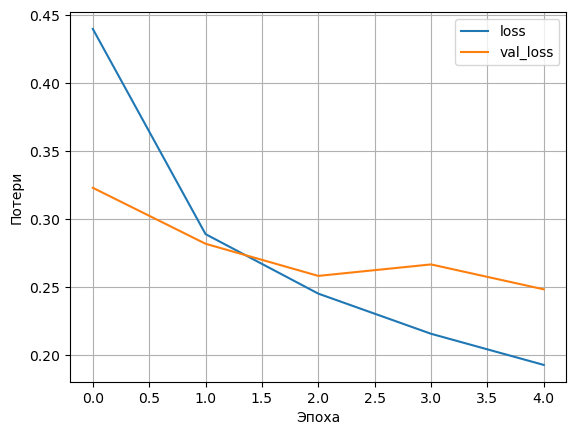

In [33]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
plot_loss(history)

Epoch 1/5
422/422 [==============================] - 13s 31ms/step - loss: 0.1732 - accuracy: 0.9371 - val_loss: 0.2571 - val_accuracy: 0.9067
Epoch 2/5
422/422 [==============================] - 13s 31ms/step - loss: 0.1576 - accuracy: 0.9431 - val_loss: 0.2489 - val_accuracy: 0.9108
Epoch 3/5
422/422 [==============================] - 13s 31ms/step - loss: 0.1401 - accuracy: 0.9491 - val_loss: 0.2468 - val_accuracy: 0.9140
Epoch 4/5
422/422 [==============================] - 14s 33ms/step - loss: 0.1285 - accuracy: 0.9529 - val_loss: 0.2476 - val_accuracy: 0.9180
Epoch 5/5
422/422 [==============================] - 13s 32ms/step - loss: 0.1131 - accuracy: 0.9597 - val_loss: 0.2703 - val_accuracy: 0.9108


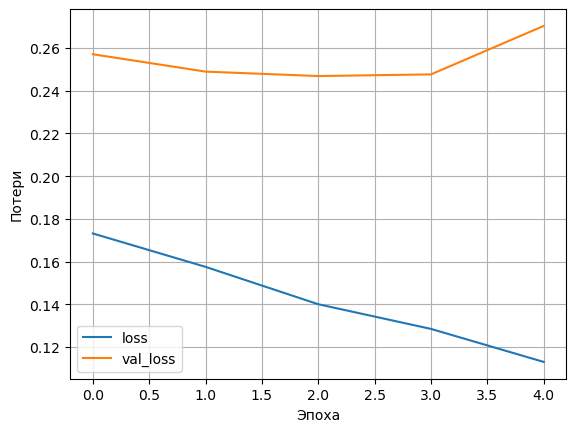

In [34]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
plot_loss(history)

In [65]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2782253324985504
Test accuracy: 0.9115999937057495


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_10 (Dense)            (None, 100)              

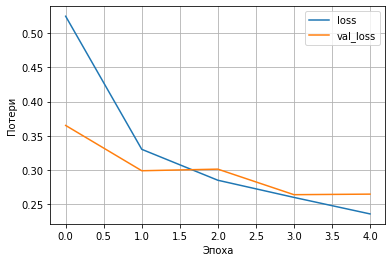

In [66]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
plot_loss(history)

In [35]:
pred = model.predict(x_test)
pred.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

In [36]:
np.round(pred[0, :], 2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [37]:
np.argmax(pred[0, :])

9

In [70]:
x_test.shape

(10000, 28, 28, 1)

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.28480276465415955
Test accuracy: 0.9106000065803528


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 100)              

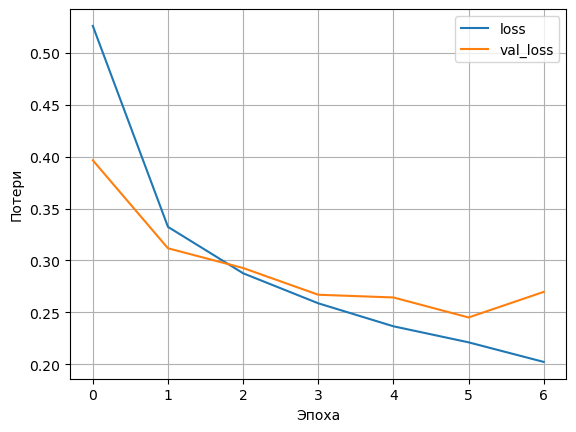

In [39]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
batch_size = 128
epochs = 7

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
plot_loss(history)

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.28272923827171326
Test accuracy: 0.8996000289916992
